# Analysis for Question 1

 Dataset consists of a dummy data reflecting real-world transactions of Hey You App.
 
 The dataset is a timeseries dataset containing the following attributes:
 
- `dayofweek` - Day of week
- `timeofday` - Time of day
- `date` - Date
- `orders` - Number of unique orders through the app
- `tpv` -Total processed volume in Australian dollars
- `customers` - Number of unique customers active/ordering
- `venues` - Number of unique merchants/venues active/trading
- `fee` - Profit
- `aov` - Average order basket value in Australian dollars
- `orders_per_cust` - Order basket size
- `ave_cust_spend` - Average customer spend per order
- `avg_orders_per_venue` - Average orders through each merchant/venues

## Goals
1. Present insights from basic explorations and beyond.
2. Quantify/visualize and show the effect of the AI system on customer behaviour

## Import and Clean the Dataset

The dataset contains 157 observations, and 12 features. 

Looking at the first 5 and last 5 rows, the observations look to be arranged by date starting from the most recent down to the oldest. 

`parse_dates` was specified when creating the dataframe in order to convert `date` column from `object` to `datetime` data type.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
baseline_df = pd.read_csv("baseline_df.csv", parse_dates = ["date"])

In [3]:
baseline_df.head()

dayofweek timeofday       date  orders           tpv  customers  venues  \
0    Friday  08:15:00 2021-06-11   13926  100785.50388      13556    1956   
1    Friday  08:15:00 2021-06-04   15204  109585.37952      14836    1988   
2    Friday  08:15:00 2021-05-28   15588  112062.95892      15195    1994   
3    Friday  08:15:00 2021-05-21   15326  108607.84884      14903    1997   
4    Friday  08:15:00 2021-05-14   15358  109774.77372      14932    2041   

          fee        aov  orders_per_cust  ave_cust_spend  \
0  1813.05216  21.102491         2.995607       21.678964   
1  1961.59320  21.017525         2.988317       21.538008   
2  2007.87012  20.962019         2.991524       21.505077   
3  1954.33236  20.663592         2.998814       21.249825   
4  1964.27592  20.841993         2.999106       21.436198   

   avg_orders_per_venue  
0             20.755213  
1             22.293403  
2             22.790873  
3             22.374468  
4             21.940859

In [4]:
baseline_df.tail()

dayofweek timeofday       date  orders           tpv  customers  venues  \
152    Friday  08:15:00 2018-07-13   15136   87956.06616      14801    2160   
153    Friday  08:15:00 2018-07-06   16425   93540.20616      16096    2204   
154    Friday  08:15:00 2018-06-29   17563  102022.26696      17131    2198   
155    Friday  08:15:00 2018-06-22   16370   97187.59728      16020    2152   
156    Friday  08:15:00 2018-06-15   17332  100645.74000      16939    2160   

            fee        aov  orders_per_cust  ave_cust_spend  \
152  1491.35904  16.943955         2.982193       17.327831   
153  1574.93160  16.605754         2.975778       16.945690   
154  1675.41696  16.938779         2.989483       17.365492   
155  1656.78372  17.311648         2.979569       17.689771   
156  1692.85464  16.932326         2.983651       17.325828   

     avg_orders_per_venue  
152             20.427746  
153             21.727408  
154             23.293300  
155             22.182012  
156             23.390986

In [5]:
print(f"# observations {baseline_df.shape[0]}\n")
print(f"# features: {baseline_df.shape[1]}\n")
print(f"Features: {baseline_df.columns.tolist()}\n")
print(f"Missing values: {baseline_df.isnull().any()}\n")
print(f"Unique value: {baseline_df.nunique()}")

# observations 157

# features: 12

Features: ['dayofweek', 'timeofday', 'date', 'orders', 'tpv', 'customers', 'venues', 'fee', 'aov', 'orders_per_cust', 'ave_cust_spend', 'avg_orders_per_venue']

Missing values: dayofweek               False
timeofday               False
date                    False
orders                  False
tpv                     False
customers               False
venues                  False
fee                     False
aov                     False
orders_per_cust         False
ave_cust_spend          False
avg_orders_per_venue    False
dtype: bool

Unique value: dayofweek                 1
timeofday                 1
date                    157
orders                  152
tpv                     157
customers               153
venues                  126
fee                     157
aov                     157
orders_per_cust          88
ave_cust_spend          157
avg_orders_per_venue    156
dtype: int64


The observations were taken every Friday at the 8:15. Since this does not add any other information, these columns were subsequently dropped. The observations are also sorted chronologically so the first observation is the oldest, the last the most recent (this is so that splicing is more intuitive). The `date` column is split into `year`, `month`, `day`. 

In [6]:
df = baseline_df.copy()
df.drop(["dayofweek", "timeofday"], axis=1, inplace=True)
df = df.set_index("date")
df = df.sort_values(by="date")
df["year"] = df.index.year
df["month"] = df.index.month
df["day"] = df.index.day

Arrange columns.

In [7]:
cols = [ 'year',
 'month',
 'day',
 'orders',
 'tpv',
 'customers',
 'venues',
 'fee',
 'avg_orders_per_venue',
  'aov',
 'orders_per_cust',
 'ave_cust_spend',
]
df = df[cols]
df.head()

year  month  day  orders           tpv  customers  venues  \
date                                                                    
2018-06-15  2018      6   15   17332  100645.74000      16939    2160   
2018-06-22  2018      6   22   16370   97187.59728      16020    2152   
2018-06-29  2018      6   29   17563  102022.26696      17131    2198   
2018-07-06  2018      7    6   16425   93540.20616      16096    2204   
2018-07-13  2018      7   13   15136   87956.06616      14801    2160   

                   fee  avg_orders_per_venue        aov  orders_per_cust  \
date                                                                       
2018-06-15  1692.85464             23.390986  16.932326         2.983651   
2018-06-22  1656.78372             22.182012  17.311648         2.979569   
2018-06-29  1675.41696             23.293300  16.938779         2.989483   
2018-07-06  1574.93160             21.727408  16.605754         2.975778   
2018-07-13  1491.35904             20.427746  16.943955         2.982193   

            ave_cust_spend  
date                        
2018-06-15       17.325828  
2018-06-22       17.689771  
2018-06-29       17.365492  
2018-07-06       16.945690  
2018-07-13       17.327831

The index has been assigned a data type of `datetime`. There are no missing values.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 157 entries, 2018-06-15 to 2021-06-11
Data columns (total 12 columns):
year                    157 non-null int64
month                   157 non-null int64
day                     157 non-null int64
orders                  157 non-null int64
tpv                     157 non-null float64
customers               157 non-null int64
venues                  157 non-null int64
fee                     157 non-null float64
avg_orders_per_venue    157 non-null float64
aov                     157 non-null float64
orders_per_cust         157 non-null float64
ave_cust_spend          157 non-null float64
dtypes: float64(6), int64(6)
memory usage: 15.9 KB


In [9]:
print("Oldest transaction:", df.index.min())
print("Younest transaction:", df.index.max())

Oldest transaction: 2018-06-15 00:00:00
Younest transaction: 2021-06-11 00:00:00


## Exploratory data analysis

In [10]:
import seaborn as sns
sns.set_theme(style="whitegrid")

Calculating basic statistics show that the ranges of the values differ widely (min and max). 

For `orders`, `tpv`, `customers`, `venues`, `fee`, and `avg_orders_per_venue`, there are large differences between the mean and median values (50% percentile), and mean values are less than the median. 

For `aov`,	`orders_per_cust`, and `ave_cust_spend`, the mean values are more than the median values but the differences were not that large.

This suggests extreme values in the dataset.

In [11]:
df.describe()

year       month         day        orders            tpv  \
count   157.000000  157.000000  157.000000    157.000000     157.000000   
mean   2019.452229    6.471338   15.891720  14370.643312   92245.867867   
std       0.963739    3.450308    8.819835   3919.106272   21119.071149   
min    2018.000000    1.000000    1.000000    603.000000    6147.773640   
25%    2019.000000    4.000000    8.000000  12664.000000   88625.667240   
50%    2019.000000    6.000000   16.000000  15204.000000   98500.263840   
75%    2020.000000    9.000000   23.000000  17408.000000  104469.432480   
max    2021.000000   12.000000   31.000000  19350.000000  115909.658640   

          customers       venues          fee  avg_orders_per_venue  \
count    157.000000   157.000000   157.000000            157.000000   
mean   14028.496815  2034.222930  1589.890309             20.227254   
std     3831.624141   451.706389   359.842966              2.685642   
min      586.000000   145.000000   111.420360              9.145742   
25%    12325.000000  1860.000000  1531.016640             19.498709   
50%    14836.000000  2160.000000  1688.597280             20.849983   
75%    17000.000000  2329.000000  1784.067120             21.804098   
max    18854.000000  2586.000000  2007.870120             23.598313   

              aov  orders_per_cust  ave_cust_spend  
count  157.000000       157.000000      157.000000  
mean    19.317668         2.988187       19.802054  
std      2.780499         0.010522        2.910881  
min     16.443318         2.967322       16.792681  
25%     17.313741         2.981902       17.689771  
50%     17.977376         2.987150       18.405337  
75%     20.962019         2.993857       21.505077  
max     35.742491         3.044304       37.316641

For years 2018 and 2021, the observations did not pan the whole year. The first month and last month did not pan the entire month.  
Year = 52 weeks; Month = 4 or 5 weeks.

In [12]:
df.groupby("year").count()

month  day  orders  tpv  customers  venues  fee  avg_orders_per_venue  \
year                                                                          
2018     29   29      29   29         29      29   29                    29   
2019     52   52      52   52         52      52   52                    52   
2020     52   52      52   52         52      52   52                    52   
2021     24   24      24   24         24      24   24                    24   

      aov  orders_per_cust  ave_cust_spend  
year                                        
2018   29               29              29  
2019   52               52              52  
2020   52               52              52  
2021   24               24              24

In [13]:
pd.DataFrame(df.groupby(["year", "month"]).day.count())

day
year month     
2018 6        3
     7        4
     8        5
     9        4
     10       4
     11       5
     12       4
2019 1        4
     2        4
     3        5
     4        4
     5        5
     6        4
     7        4
     8        5
     9        4
     10       4
     11       5
     12       4
2020 1        5
     2        4
     3        4
     4        4
     5        5
     6        4
     7        5
     8        4
     9        4
     10       5
     11       4
     12       4
2021 1        5
     2        4
     3        4
     4        5
     5        4
     6        2

In [14]:
for var in df.iloc[:,3:].columns:
    print(var)
    print(df.groupby("year").describe()[var][["mean","std"]])
    print()

orders
              mean          std
year                           
2018  16714.206897  2888.736555
2019  16093.903846  3720.934820
2020  12275.096154  3032.503659
2021  12345.458333  3883.182312

tpv
              mean           std
year                            
2018  97267.079396  15996.220652
2019  96827.317068  21810.401565
2020  86526.833622  18928.289289
2021  88643.338200  26413.273407

customers
              mean          std
year                           
2018  16333.689655  2824.198105
2019  15718.615385  3628.254056
2020  11973.557692  2964.415853
2021  12033.500000  3785.908506

venues
             mean         std
year                         
2018  2201.068966  275.664902
2019  2285.230769  408.744832
2020  1827.442308  392.055589
2021  1736.791667  462.148102

fee
             mean         std
year                         
2018  1640.110233  269.879686
2019  1627.772885  367.655459
2020  1529.717338  337.313023
2021  1577.503755  472.015858

avg_orders_per_venue


### Visualization

In [15]:
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import numpy as np

Interactive plot using plotly. See [baseline_plots.html](baseline_plots.html)

In [16]:
fig = px.line(baseline_df, x="date", y=df.columns.tolist()[3:], title="Baseline Data Plots")

fig.add_vline(x="2021-05-07", line_dash="dash", line_color="green")
fig.add_vrect(x0="2021-05-07", x1="2021-06-11", 
              annotation_text="AI", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vline(x="2020-03-06", line_dash="dash", line_color="red")
fig.add_vrect(x0="2020-03-06", x1="2021-06-11", 
              annotation_text="COVID-19", annotation_position="top left",
              opacity=0.25, line_width=0)


fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=37, label="4y", step="month", stepmode="backward"),
            dict(count=30, label="3y", step="month", stepmode="backward"),
            dict(count=18, label="2y", step="month", stepmode="backward"),
            dict(count=6, label="1y", step="month", stepmode="backward"),
            dict(step="all")
        ])
    )

)

fig.show()

fig.write_html("baseline_plots.html")

#### Patterns

Text(0.5, 0.98, 'Raw baseline values')

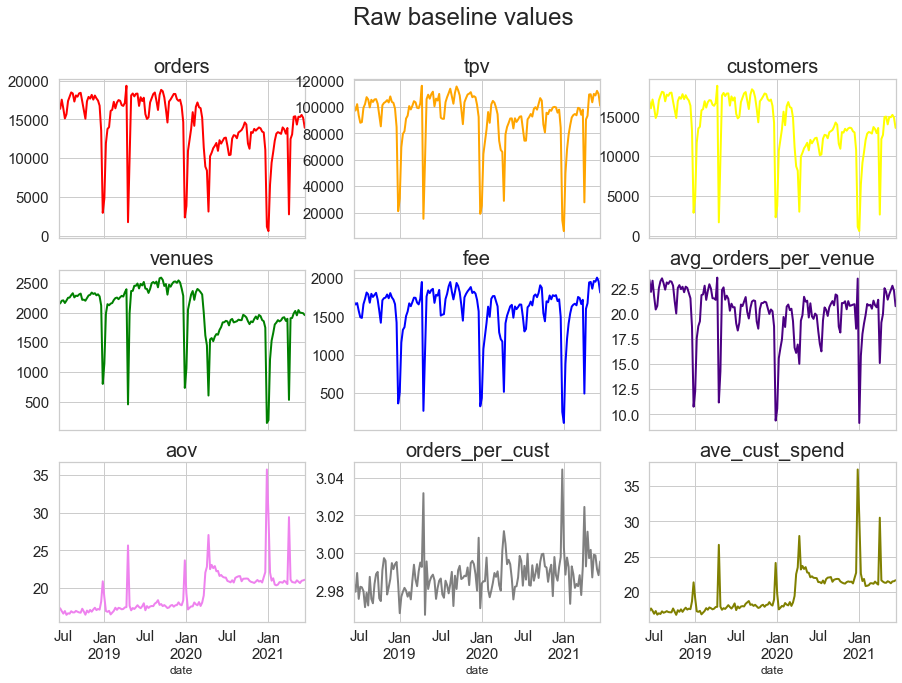

In [17]:
plt.rc('font', size=20)
plt.rc("figure",figsize=(15,10))

fig, ax = plt.subplots(3, 3, sharex=True)
cols = df.columns.tolist()[3:]
c=-1
colors = ["red","orange","yellow", "green", "blue", "indigo", "violet", "grey", "olive" ]
for i in range(3):
    for j in range(3):
        c+=1
        df.loc[:,cols[c]].plot(legend = False, ax=ax[i,j],color=colors[c], fontsize=15, linewidth=2.0)
        ax[i,j].set_title(cols[c], fontsize=20)
fig.suptitle("Raw baseline values")

Add dashed-lines to indicate seasonal pattern.

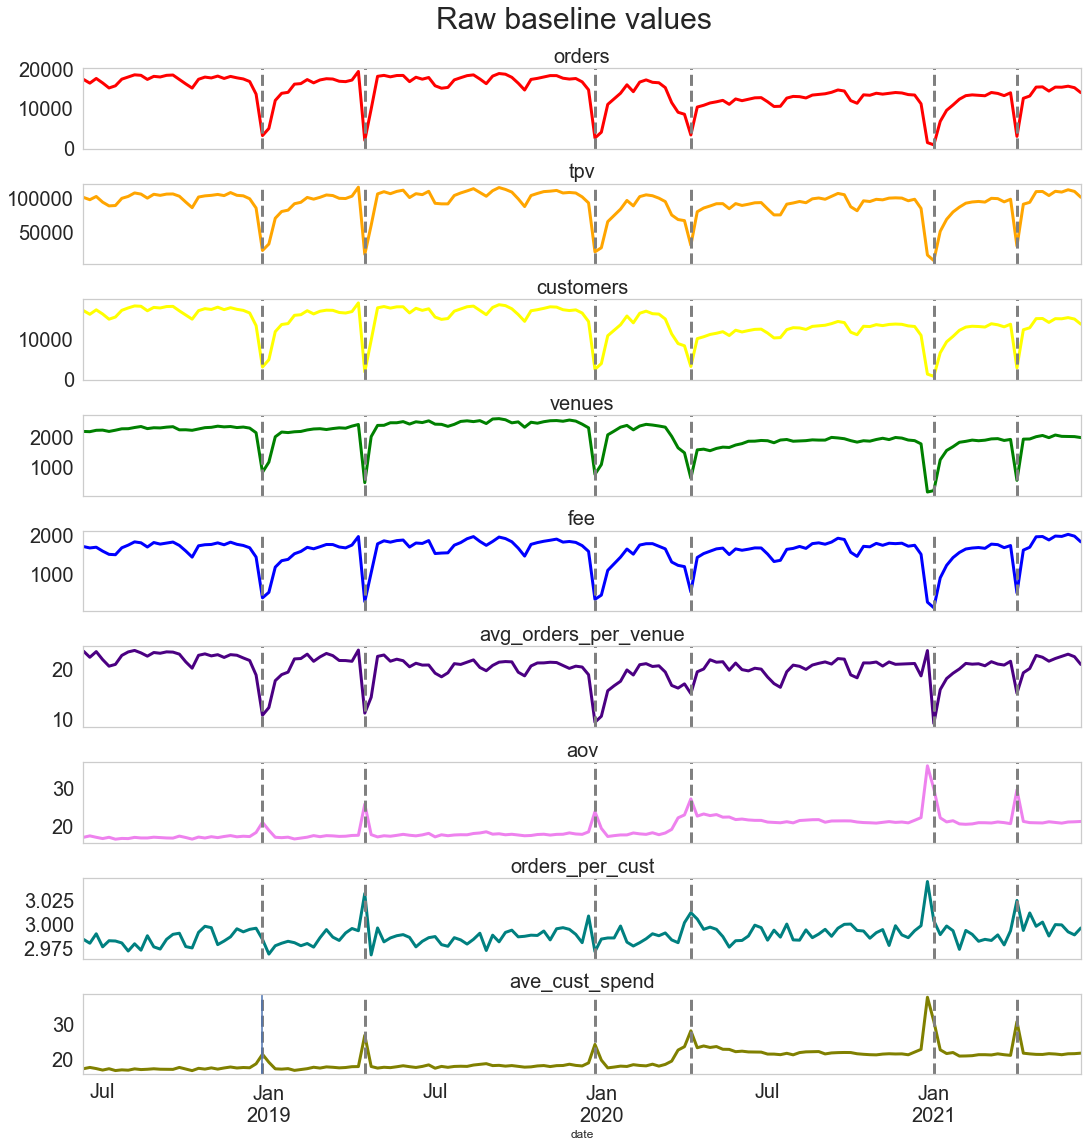

In [18]:
plt.rc('font', size=25)
plt.rc("figure",figsize=(15,15))

fig, ax = plt.subplots(9, 1, sharex=True)
fig.tight_layout(pad=1)
cols = df.columns.tolist()[3:]
c=-1
colors = ["red","orange","yellow", "green", "blue", "indigo", "violet", "teal", "olive" ]
dates = ["2018-12-28", "2019-04-19", "2019-12-27", "2020-04-10", "2021-01-01", "2021-04-02"]
for i in range(9):
    c+=1
    df.loc[:,cols[c]].plot(ax=ax[i], legend=False,
                           color=colors[c], 
                           linewidth=3.0,
                          fontsize=20)
#     ax[i].legend(fontsize=20, loc="upper left")
    ax[i].set_title(cols[c], fontsize=20)
    for d in range(6):
        ax[i].axvline(dates[d], color="grey", linestyle="--", linewidth=3.0)
    ax[i].grid(False)
fig.suptitle("Raw baseline values",y=1.03)
plt.axvline(dates[0])

Observed lift in values in two variables at around March 2020. Added indicator of when the AI system was used.

Text(0.5, 0.98, 'Raw baseline values')

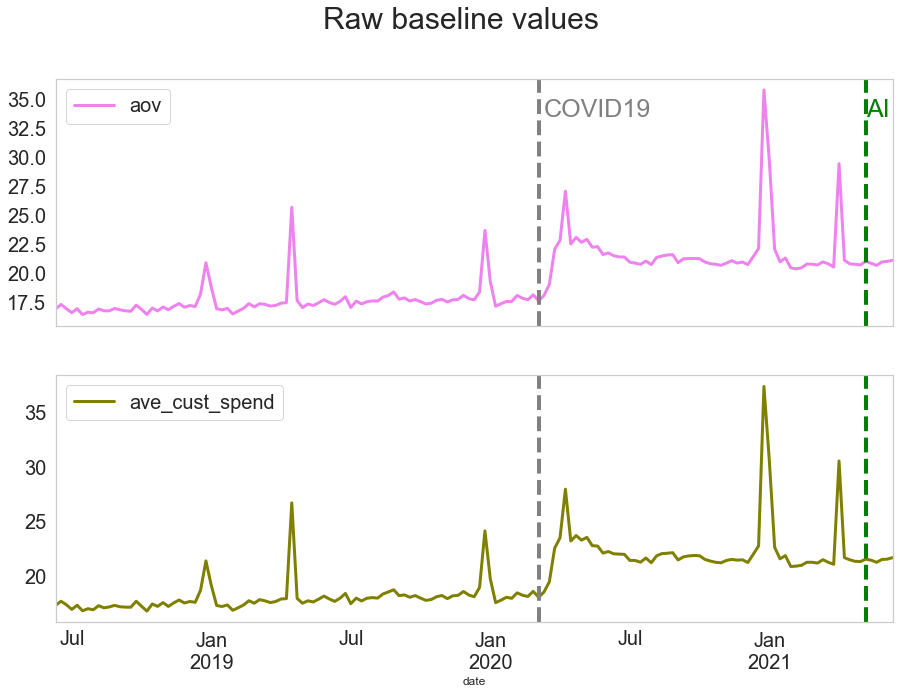

In [19]:
plt.rc('font', size=25)
plt.rc("figure",figsize=(15,10))

fig, ax = plt.subplots(2, 1, sharex=True)
cols = ['aov', 'ave_cust_spend']
c=-1
colors = ["violet", "olive" ]
dates = ["2020-03-06", "2021-05"]
for i in range(2):
    c+=1
    df.loc[:,cols[c]].plot(ax=ax[i],
                           color=colors[c], 
                           linewidth=3.0,
                          fontsize=20)
    ax[i].legend(fontsize=20, loc="center top")
    ax[i].axvline(dates[0], color="grey", linestyle="--", linewidth=4.0)
    ax[i].axvline(dates[1], color="green", linestyle="--", linewidth=4.0)
    ax[i].grid(False)

ax[0].annotate('COVID19', xy=("2020-03-12", 35),
            horizontalalignment='left', verticalalignment='top',
            color="grey")
ax[0].annotate("AI", xy=("2021-05-07", 35),
            horizontalalignment='left', verticalalignment='top',
            color="green")


fig.suptitle("Raw baseline values")

Zoom into 2021 data when AI system was introducted on May. Pattern show no perceptible changes. Only 6 observations during AI sytem use.

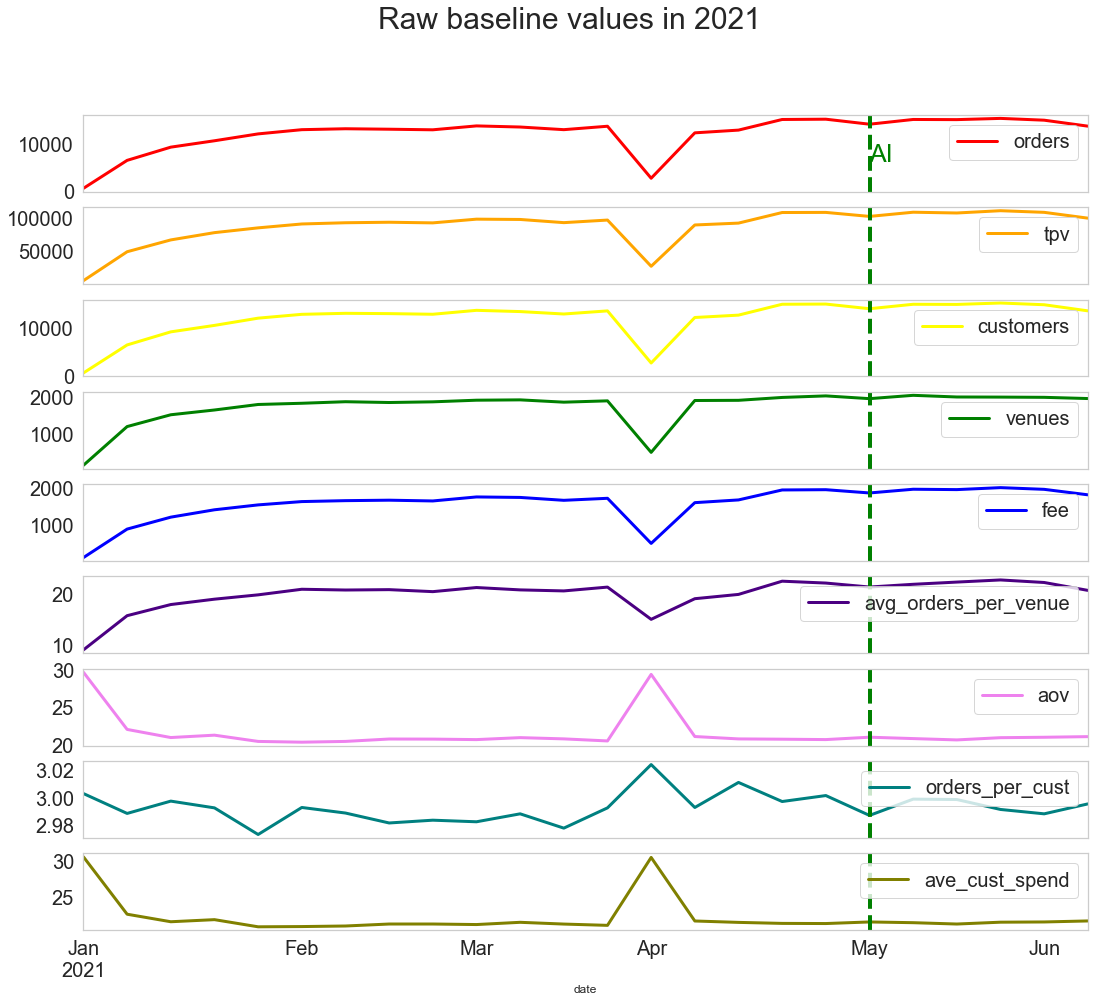

In [20]:
plt.rc('font', size=25)
plt.rc("figure",figsize=(18,15))

fig, ax = plt.subplots(9, 1, sharex=True)
cols = df.columns.tolist()[3:]
c=-1
colors = ["red","orange","yellow", "green", "blue", "indigo", "violet", "teal", "olive" ]
for i in range(9):
    c+=1
    data = df.loc["2021":,cols[c]]
    data.plot(ax=ax[i], legend=True,
                           color=colors[c], 
                           linewidth=3.0,
                          fontsize=20)
    ax[i].legend(fontsize=20, loc="upper right")
#     ax[i].set_title(cols[c], fontsize=20)
    ax[i].axvline("2021-05", color="green", linestyle="--", linewidth=4.0)
    ax[i].grid(False)

ax[0].annotate("AI", xy=("2021-05-07", 10200),
            horizontalalignment='left', verticalalignment='top',
            color="green")

fig.suptitle("Raw baseline values in 2021")
plt.axvline(dates[0])

#### Summary statistics plots

Mean change of values per year

Text(0.5, 0.98, 'Average baseline values per year')

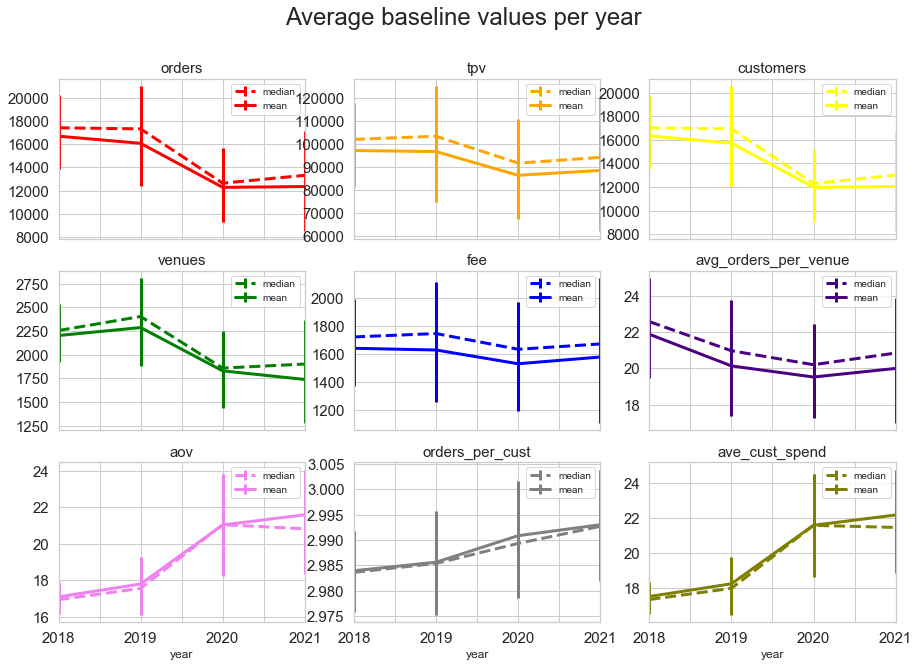

In [21]:
plt.rc("figure",figsize=(15,10))

plt.rc('font', size=20)
df_year = df.groupby("year").agg([np.mean, np.median, np.std]).drop(["month", "day"], axis=1)
df_year.index = df_year.index.astype(str)

fig, ax = plt.subplots(3, 3, sharex=True)
cols = df.columns.tolist()[3:]
c=-1
colors = ["red","orange","yellow", "green", "blue", "indigo", "violet", "grey", "olive" ]
for i in range(3):
    for j in range(3):
        c+=1
        df_year.loc[:,cols[c]].plot(kind = "line", y = "median", legend = False, yerr = "std", ax=ax[i,j],
                                   color=colors[c], linewidth=3.0, fontsize=15, linestyle="--", label="median")
        df_year.loc[:,cols[c]].plot(kind = "line", y = "mean", legend = False, yerr = "std", ax=ax[i,j],
                                   color=colors[c], linewidth=3.0, fontsize=15, label="mean")
        ax[i,j].set_title(cols[c], fontsize=15)
        ax[i,j].legend(loc="upper rigth", fontsize=10)
fig.suptitle("Average baseline values per year")

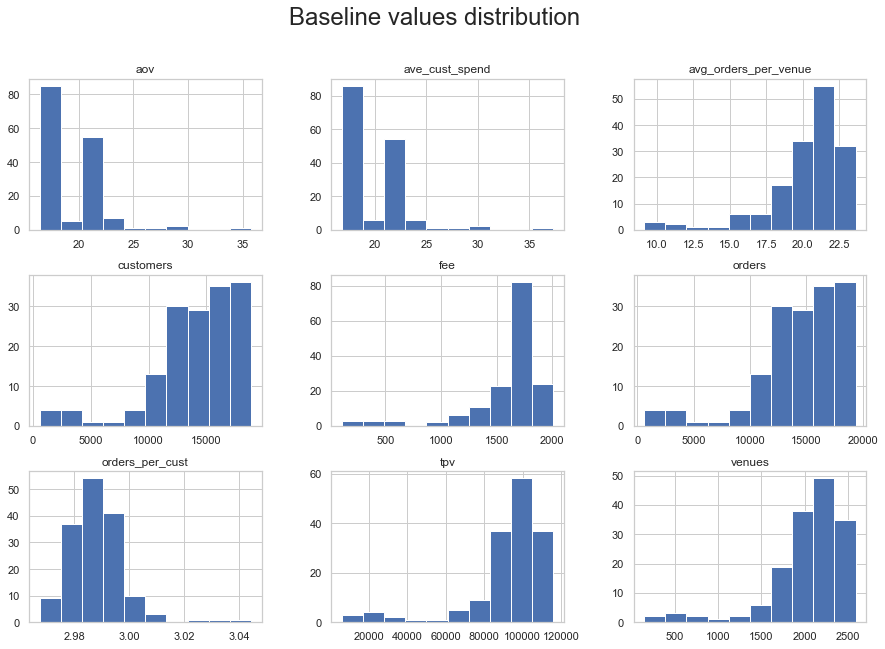

In [22]:
df.drop(["year", "month", "day"], axis=1).hist(figsize=(15,10))
# sns.distplot(df.drop(["year", "month", "day"], axis=1))
plt.suptitle("Baseline values distribution")
plt.show()

Text(0.5, 0.98, 'Distribution by year')

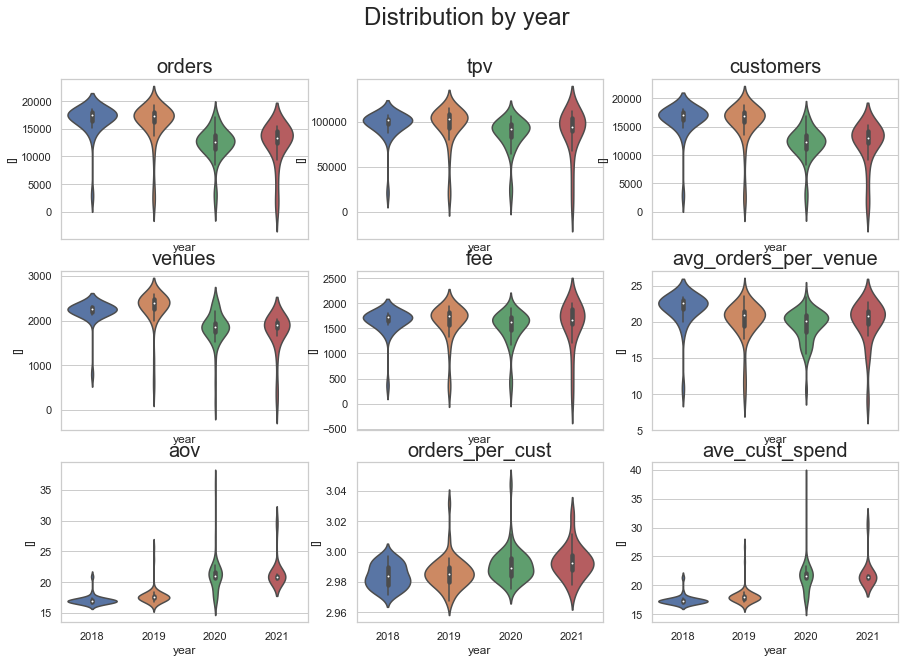

In [23]:
plt.rc('font', size=20)
plt.rc("figure",figsize=(15,10))

fig, ax = plt.subplots(3, 3, sharex=True)
cols = df.columns.tolist()[3:]
c=-1
colors = ["red","orange","yellow", "green", "blue", "indigo", "violet", "teal", "olive" ]
for i in range(3):
    for j in range(3):
        c+=1
        data = df[[cols[c],"year"]]
        sns.violinplot(x="year", y=cols[c], data=data, ax=ax[i,j], legend=False, fontsize=40)#, color="0.8")
#         sns.boxplot(x="year", y=cols[c], data=data, ax=ax[i,j])
#         sns.stripplot(x="year", y=cols[c], data=data, jitter=True, ax=ax[i,j])
        ax[i,j].set_title(cols[c], fontsize=20)
        ax[i,j].set_ylabel([])
fig.suptitle("Distribution by year")

Text(0.5, 0.98, 'Distribution by month')

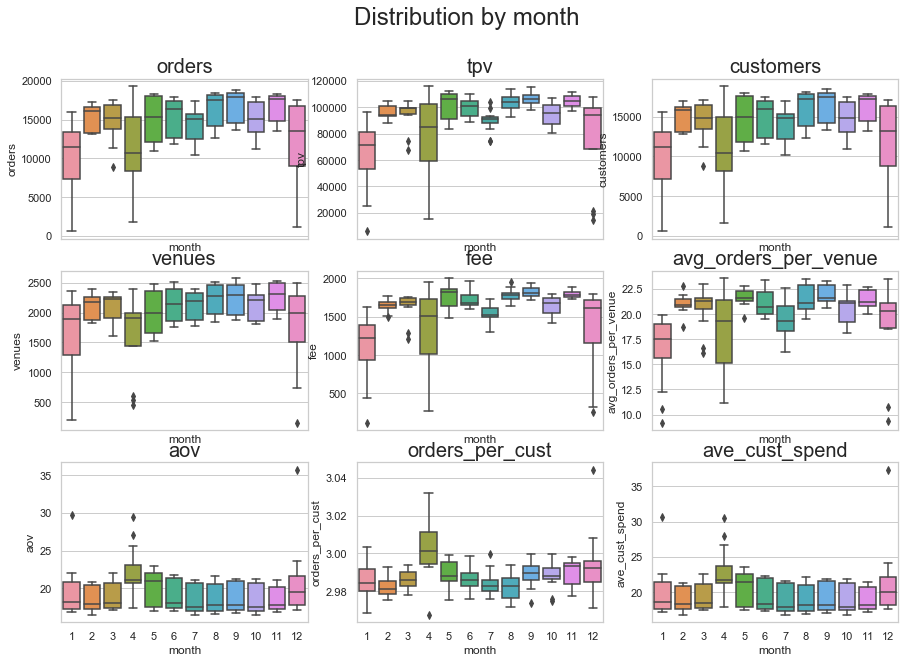

In [24]:
plt.rc('font', size=20)
plt.rc("figure",figsize=(15,10))

fig, ax = plt.subplots(3, 3, sharex=True)
cols = df.columns.tolist()[3:]
c=-1
colors = ["red","orange","yellow", "green", "blue", "indigo", "violet", "teal", "olive" ]
for i in range(3):
    for j in range(3):
        c+=1
        data = df[[cols[c],"month"]]
        sns.boxplot(x="month", y=cols[c], data=data, ax=ax[i,j])#, color="0.8")
#         sns.stripplot(x="year", y=cols[c], data=data, jitter=True, ax=ax[i,j])
        ax[i,j].set_title(cols[c], fontsize=20)
fig.suptitle("Distribution by month")

## Correlation
- Perfect: If the value is near ± 1, then it said to be a perfect correlation: as one variable increases, the other variable tends to also increase (if positive) or decrease (if negative).
- High degree: If the coefficient value lies between ± 0.50 and ± 1, then it is said to be a strong correlation.
- Moderate degree: If the value lies between ± 0.30 and ± 0.49, then it is said to be a medium correlation.
- Low degree: When the value lies below + .29, then it is said to be a small correlation.
- No correlation: When the value is zero.  

[Source](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient)

### Multicollinearity

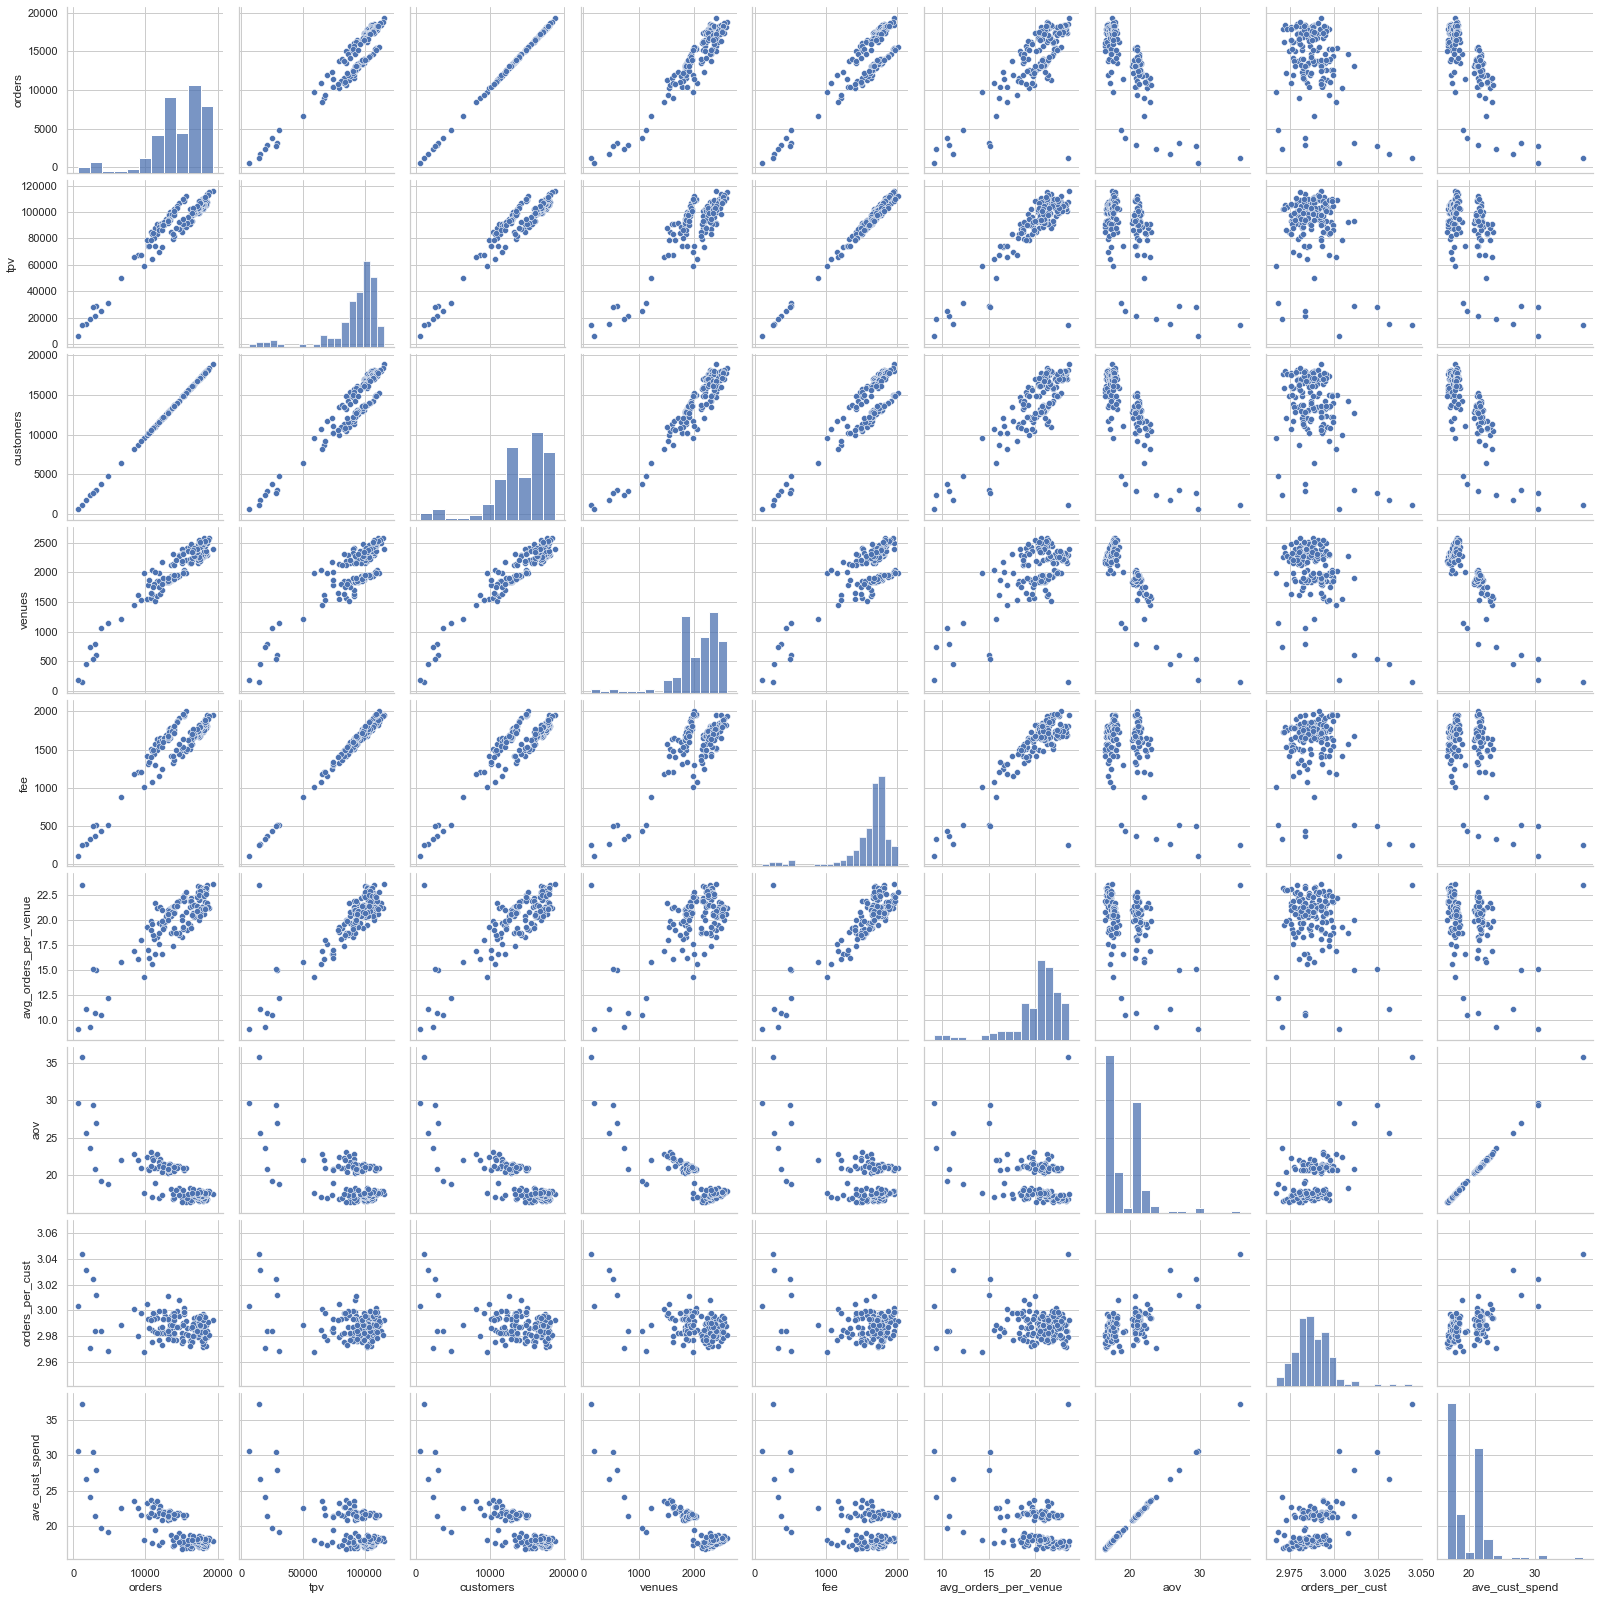

In [25]:
plt.rcParams["figure.figsize"] = (5,5)
plt.rc('font', size=2)
ax = sns.pairplot(df.loc[:,"orders":])

Text(0.5, 1, 'Correlations among the baseline variables (Pearson coefficients)')

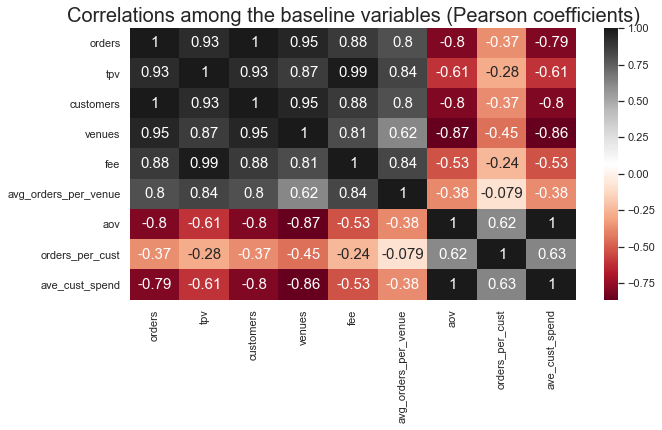

In [26]:
plt.figure(figsize=(10,5))
plt.rc('font', size=15)
ax = sns.heatmap(df.loc[:,"orders":].corr(method="pearson"), cmap="RdGy", annot=True)
ax.set_title("Correlations among the baseline variables (Pearson coefficients)", fontsize=20)

### Autocorrelation
Autocorrelations shows correlation of time series observations with observations in previous time steps (lags).

In [27]:
from statsmodels.graphics.tsaplots import plot_acf

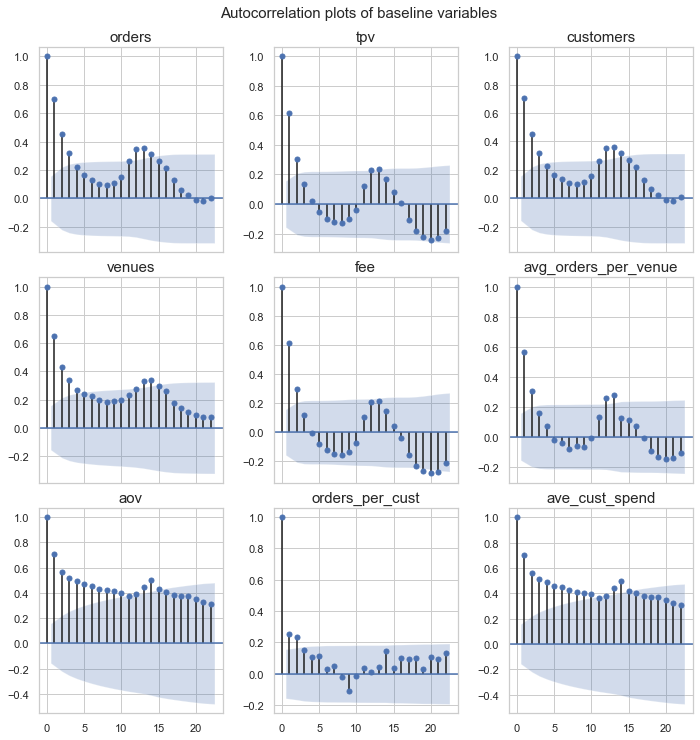

In [28]:
# plt.figure(figsize=(20,10))
plt.rc('font', size=15)

fig, ax = plt.subplots(3, 3, sharex=True, figsize=(10,10))
fig.tight_layout(pad=1)
fig.suptitle("Autocorrelation plots of baseline variables", fontsize=15, y=1.03)
cols = df.columns.tolist()[3:]
c=-1
for i in range(3):
    for j in range(3):
        c+=1
        data = df[[cols[c]]]
        plot_acf(data, ax=ax[i,j])
        ax[i,j].set_title(cols[c], fontsize=15)
#         ax[i,j].set_ylim(-1,1)

## Partial autocorrelation
A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

[Source](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation)

In [29]:
from statsmodels.graphics.tsaplots import plot_pacf

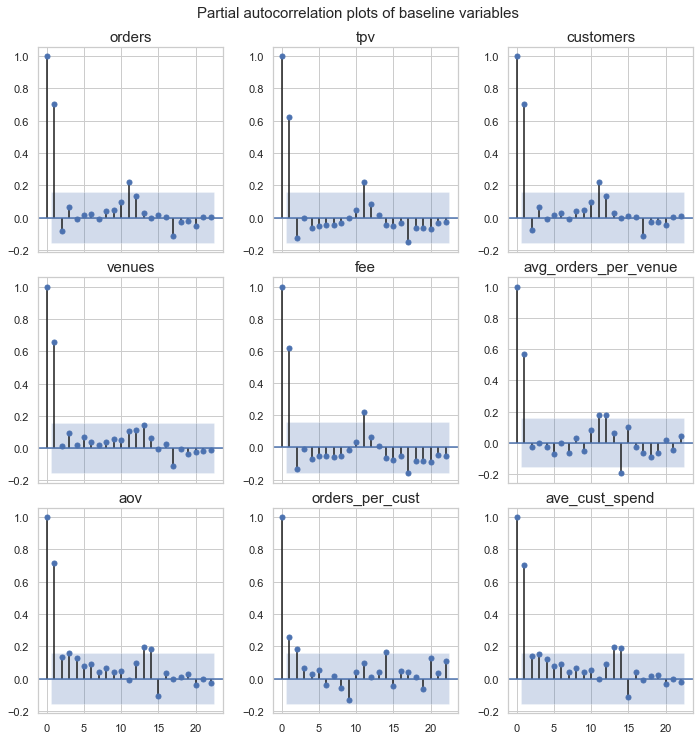

In [30]:
# plt.figure(figsize=(20,10))
plt.rc('font', size=15)

fig, ax = plt.subplots(3, 3, sharex=True, figsize=(10,10))
fig.tight_layout(pad=1)
fig.suptitle("Partial autocorrelation plots of baseline variables", fontsize=15, y=1.03)
cols = df.columns.tolist()[3:]
c=-1
for i in range(3):
    for j in range(3):
        c+=1
        data = df[[cols[c]]]
        plot_pacf(data, ax=ax[i,j])
        ax[i,j].set_title(cols[c], fontsize=15)
#         ax[i,j].set_ylim(-1,1)

### Lag plots
- `lag=1` is a lag of 1 week
- `lag=4` is a lag of 1 month
- `lag=12` is a lag of 1 quarter
- `lag=52` is a lag of 1 year

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

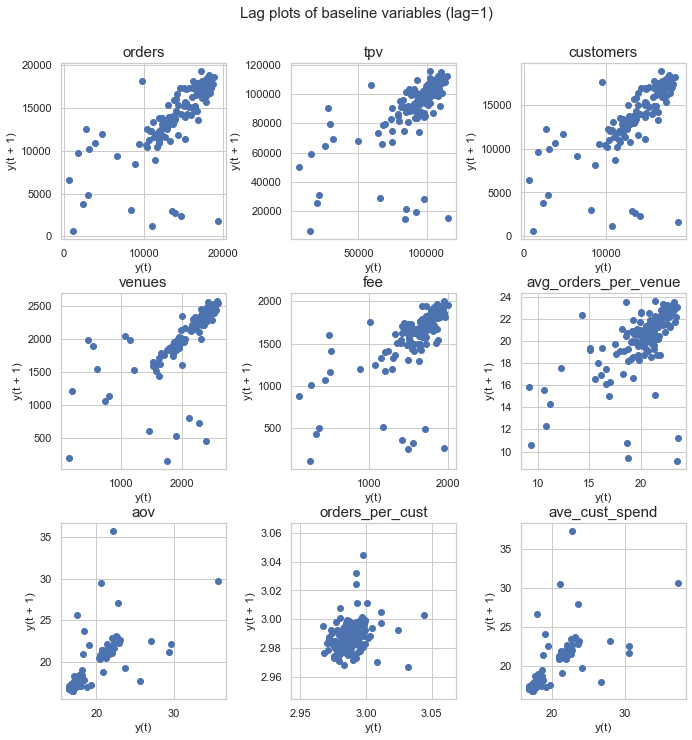

In [31]:
# plt.figure(figsize=(20,10))
plt.rc('font', size=15)

fig, ax = plt.subplots(3, 3, figsize=(10,10))
fig.tight_layout(pad=2)
lag=1
fig.suptitle(f"Lag plots of baseline variables (lag={lag})", fontsize=15, y=1.03)
cols = df.columns.tolist()[3:]
c=-1
for i in range(3):
    for j in range(3):
        c+=1
        data = df[[cols[c]]]
        pd.plotting.lag_plot(data, ax=ax[i,j], lag=lag)
        ax[i,j].set_title(cols[c], fontsize=15)
#         ax[i,j].set_ylim(-1,1)

## Stationarity

Augmented Dickey-Fuller test
- Null Hypothesis (H0): If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

[Source](https://machinelearningmastery.com/time-series-data-stationary-python)

In [32]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [33]:
for var in df.iloc[:,3:].columns.tolist():
    X = df.loc[:, var]
    result = adfuller(X)
    print(var)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print()

orders
ADF Statistic: -5.229753
p-value: 0.000008
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577

tpv
ADF Statistic: -6.072933
p-value: 0.000000
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577

customers
ADF Statistic: -5.208233
p-value: 0.000008
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577

venues
ADF Statistic: -5.690955
p-value: 0.000001
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577

fee
ADF Statistic: -6.141386
p-value: 0.000000
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577

avg_orders_per_venue
ADF Statistic: -6.568199
p-value: 0.000000
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577

aov
ADF Statistic: -2.847900
p-value: 0.051751
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577

orders_per_cust
ADF Statistic: -6.291722
p-value: 0.000000
Critical Values:
	1%: -3.473
	5%: -2.880
	10%: -2.577

ave_cust_spend
ADF Statistic: -2.884716
p-value: 0.047154
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577



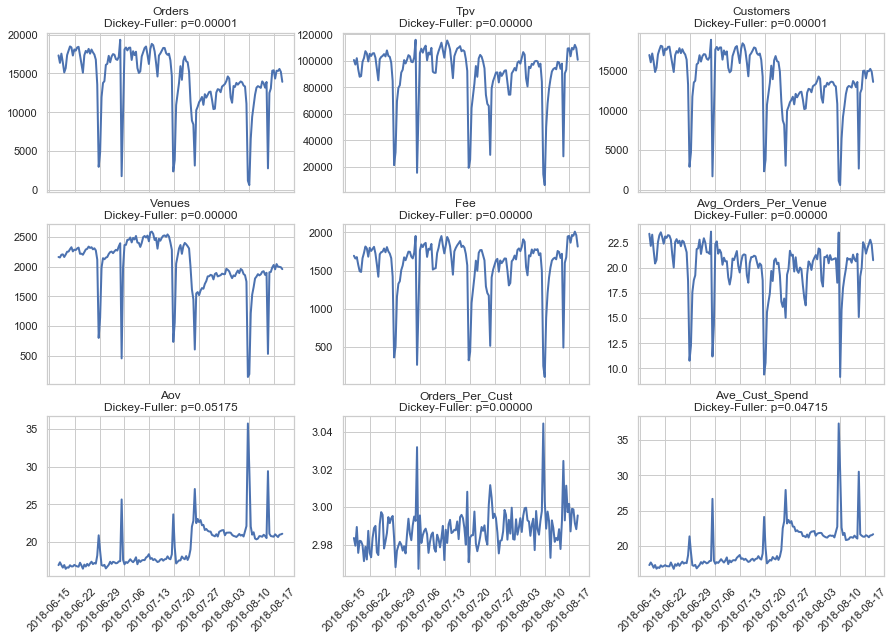

In [34]:
plt.rcParams["figure.figsize"] = (15,10)
plt.rc('font', size=30)
# df[vars].plot(subplots=True)

fig, axes = plt.subplots(3, 3, sharex=True)
cols = df.columns.tolist()[3:]
c=-1
for i in range(3):
    for j in range(3):
        c +=1
        data = df.loc[:,cols[c]]
        p_value = sm.tsa.stattools.adfuller(data)[1]
        axes[i, j].plot(data, linewidth=2.0)
        axes[i, j].set_title(f"{cols[c].title()}\nDickey-Fuller: p={p_value:.5f}")
        if i == 2: 
            axes[i,j].set_xticklabels(df.index.astype(str), rotation=45)

## Focus: Average customer spend

In [35]:
dfx = df.ave_cust_spend
dfx.tail()

date
2021-05-14    21.436198
2021-05-21    21.249825
2021-05-28    21.505077
2021-06-04    21.538008
2021-06-11    21.678964
Name: ave_cust_spend, dtype: float64

In [36]:
fig = px.line(baseline_df, x="date", y="ave_cust_spend", title="Average Customer Spend Plot<br>Dickey-Fuller: p=0.061577",
             labels={
                     "ave_cust_spend": "Average customer spend per order (AUD)",
                 })
fig.add_vline(x="2021-05-07", line_dash="dash", line_color="green")
fig.add_vrect(x0="2021-05-07", x1="2021-06-11", 
              annotation_text="AI", annotation_position="top left",
              fillcolor="green", opacity=0.25, line_width=0)
fig.add_vline(x="2020-03-06", line_dash="dash", line_color="red")
fig.add_vrect(x0="2020-03-06", x1="2021-06-11", 
              annotation_text="COVID-19", annotation_position="top left",
              opacity=0.25, line_width=0)
fig.show()
fig.write_html("ave_cust_spend.html")

## Modelling

Code reference: https://www.machinelearningplus.com/arima-model-time-series-forecasting-python/

In [37]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import acf
import pmdarima as pm

C:\Users\Marylette\Anaconda3\envs\mglearn\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

C:\Users\Marylette\Anaconda3\envs\mglearn\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



### Visualization

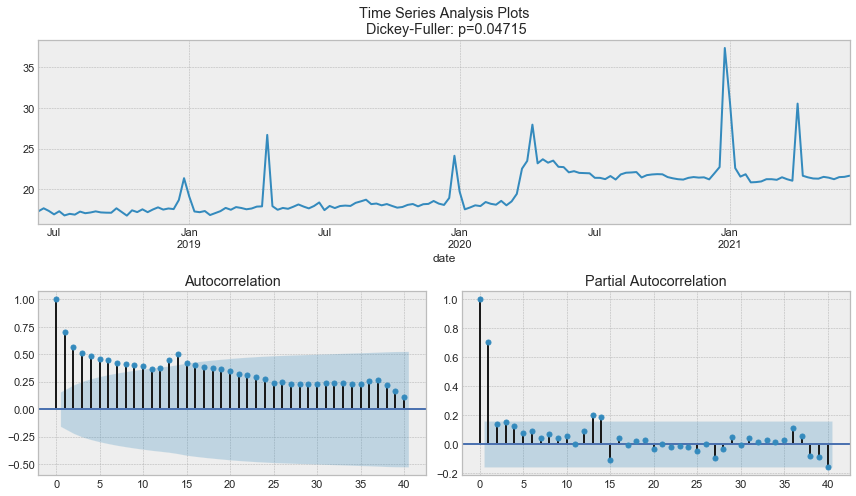

In [38]:
plt.rcParams["figure.figsize"] = (10,7)
plt.rc('font', size=10)

def tsplot(y, lags=None, figsize=(12, 7), syle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout = (2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(dfx, lags=40)

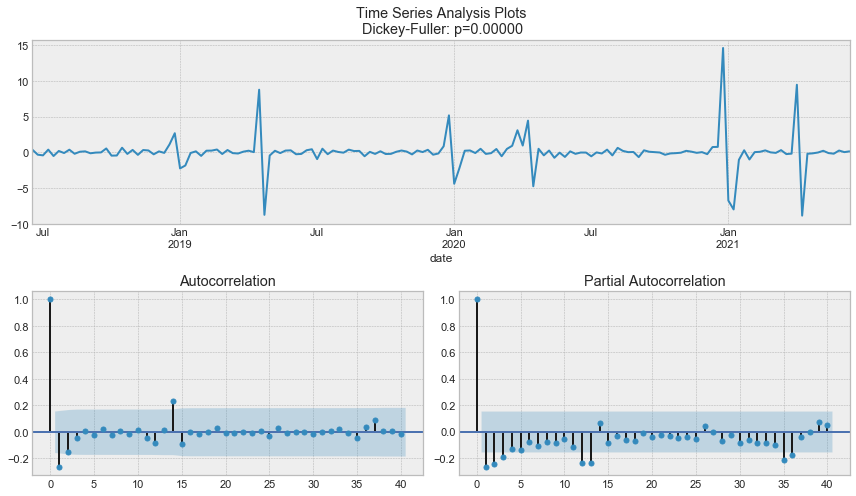

In [39]:
# Take the first difference to remove to make the process stationary
dfx_diff = dfx - dfx.shift(1)

tsplot(dfx_diff[1:], lags=40)

## Prepare dataset (exclude intervention)

 Excluding May 2021 onwards

In [40]:
dfx2 = dfx.loc[:"2021-04"]
dfx2.tail()
#print(len(dfx2))

date
2021-04-02    30.507358
2021-04-09    21.672012
2021-04-16    21.477801
2021-04-23    21.338728
2021-04-30    21.317272
Name: ave_cust_spend, dtype: float64

### Split into train and test set

In [41]:
n = int(len(dfx2) * .75)
train = dfx2[:n]
test = dfx2[n:]
print(f"Lenght of train set: {len(train)}")
print(f"Lenght of test set: {len(test)}")

Lenght of train set: 113
Lenght of test set: 38


### Run model on train test and choose best hyperparameter

Implemented stepwise auto-SARIMA which will automatically select the best hyperparameters given a set. Used `m=52` which equivalent to a year or 52 weeks.

In [42]:
smodel = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=241.119, BIC=251.590, Fit time=19.430 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=274.025, BIC=278.213, Fit time=0.183 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=229.561, BIC=237.939, Fit time=6.919 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=240.505, BIC=248.882, Fit time=7.541 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=251.831, BIC=258.114, Fit time=0.282 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 52); AIC=231.561, BIC=242.033, Fit time=21.264 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=231.561, BIC=242.033, Fit time=7.293 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 52); AIC=233.561, BIC=246.127, Fit time=28.254 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=250.865, BIC=257.148, Fit time=3.533 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  113
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 52)   Log Likelihood                -103.873
Date:                             Fri, 18 Jun 2021   AIC                            217.745
Time:                                     14:01:42   BIC                            228.217
Sample:                                          0   HQIC                           221.841
                                             - 113                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0044      0.034     -0.132      0.895      -0.070       0.061
ma.L1         -0.9474      0.115     -8.216      0.000      -1.173      -0.721
ma.L2          0.2126      0.194      1.094      0.274      -0.168       0.593
ar.S.L52      -0.9935      0.004   -236.687      0.000      -1.002      -0.985
sigma2         0.0423      0.027      1.561      0.119      -0.011       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               160.43
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              86.06   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The best model has according to `autoarima` has the following settings and scores:

`order=(0, 1, 2) seasonal_order=(1, 1, 0, 52); AIC=217.745, BIC=228.217`

### Evaluate the model on the test set

In [43]:
# Accuracy metrics

def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(forecast-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

n_periods = len(test)
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
forecast_accuracy(fitted, test.values)

{'mape': 0.053057219870143404,
 'me': -0.2171487904579565,
 'mae': 1.3890282066145052,
 'mpe': 0.0017575027302436973,
 'rmse': 3.046872206786293,
 'acf1': 0.25969114894243817,
 'corr': 0.3449390036899051,
 'minmax': 0.04904654204428249}

Around 5.3% MAPE implies the model is about 94.7% accurate in predicting the next 38 observations.

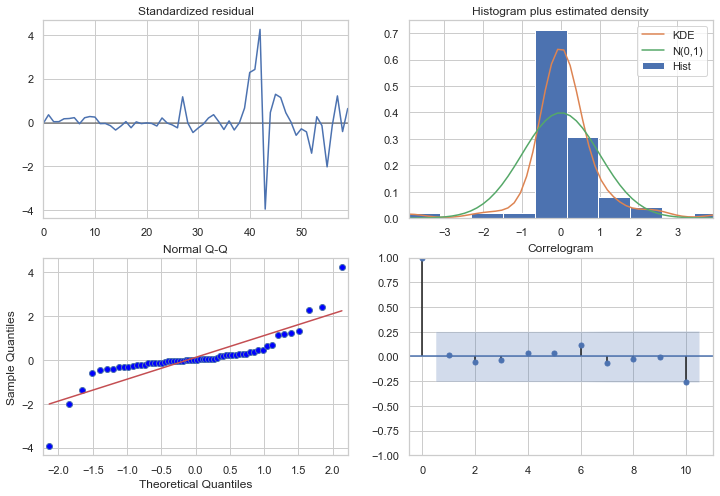

In [44]:
smodel.plot_diagnostics(figsize=(12,8))
plt.show()


## Run model on entire dataset

Settings to use: `order=(0, 1, 2)` and `seasonal_order=(1, 1, 0, 52)`

In [45]:
# Build Model
order=(0, 1, 2)
seasonal_order=(1, 1, 0, 52)
smodel = sm.tsa.statespace.SARIMAX(dfx2,
                order=order,
                seasonal_order=seasonal_order,
                freq=dfx2.index.inferred_freq)
fitted = smodel.fit(disp=-1)  
print(fitted.summary())

C:\Users\Marylette\Anaconda3\envs\mglearn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



                                      SARIMAX Results                                      
Dep. Variable:                      ave_cust_spend   No. Observations:                  151
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 52)   Log Likelihood                -216.490
Date:                             Fri, 18 Jun 2021   AIC                            440.981
Time:                                     14:01:48   BIC                            451.321
Sample:                                 06-15-2018   HQIC                           445.163
                                      - 04-30-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7007      0.058    -12.055      0.000      -0.815      -0.587
ma.L2          0.0081      

Plot prediction

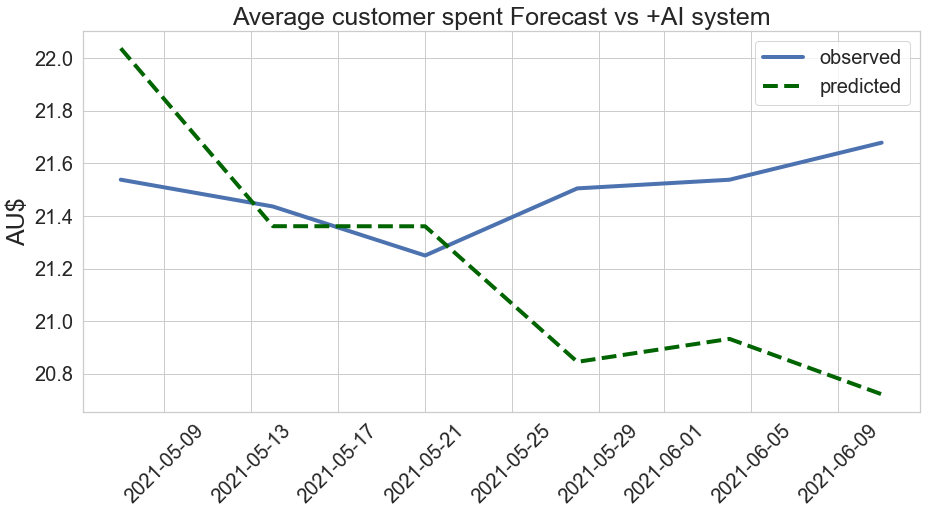

In [46]:
# Forecast
plt.rcParams["figure.figsize"] = (15,7)
plt.rc('font', size=10)

n_periods = 6
index_of_fc = pd.date_range("2021-05-07", periods = n_periods, freq='7D')
fc = fitted.predict(start=index_of_fc[0], end=index_of_fc[-1], return_conf_int=True)

# make series for plotting purpose
fitted_series = pd.Series(fc, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig, axes = plt.subplots(1, 1)
axes.plot(dfx.loc["2021-05":], linewidth=4.0, label="observed")
axes.plot(fitted_series, color='darkgreen', linewidth=4.0, label="predicted",  linestyle="--")
axes.legend(fontsize=20, loc="upper right")
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title("Average customer spent Forecast vs +AI system", fontsize=25)
plt.ylabel("AU$", fontsize=25)
plt.show()

In [47]:
ai = pd.DataFrame(dfx.loc["2021-05":].values, columns=["observed (with ai)"])
ai["predicted"] = fc.values
ai.index = dfx.loc["2021-05":].index
ai

observed (with ai)  predicted
date                                     
2021-05-07           21.538188  22.037659
2021-05-14           21.436198  21.361314
2021-05-21           21.249825  21.360935
2021-05-28           21.505077  20.845435
2021-06-04           21.538008  20.932773
2021-06-11           21.678964  20.722156

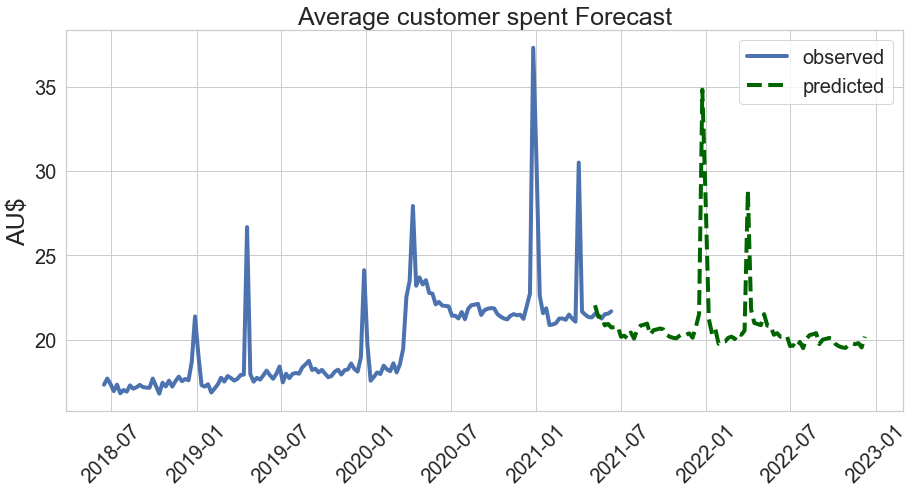

In [48]:
# Forecast
plt.rcParams["figure.figsize"] = (15,7)
plt.rc('font', size=10)

n_periods = 84
index_of_fc = pd.date_range("2021-05-07", periods = n_periods, freq='7D')
fc = fitted.predict(start=index_of_fc[0], end=index_of_fc[-1], return_conf_int=True)

# make series for plotting purpose
fitted_series = pd.Series(fc, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig, axes = plt.subplots(1, 1)
axes.plot(dfx, linewidth=4.0, label="observed")
axes.plot(fitted_series, color='darkgreen', linewidth=4.0, label="predicted",  linestyle="--")
axes.legend(fontsize=20, loc="upper right")
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title("Average customer spent Forecast", fontsize=25)
plt.ylabel("AU$", fontsize=25)
plt.show()

### Run the model including the AI

In [49]:
n = int(len(dfx2) * .75)
train = dfx[:n]
test = dfx[n:]
print(f"Lenght of train set: {len(train)}")
print(f"Lenght of test set: {len(test)}")

Lenght of train set: 113
Lenght of test set: 44


In [50]:
smodel2 = pm.auto_arima(train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=52,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel2.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=241.119, BIC=251.590, Fit time=9.983 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=274.025, BIC=278.213, Fit time=0.182 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=229.561, BIC=237.939, Fit time=7.009 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=240.505, BIC=248.882, Fit time=7.187 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=251.831, BIC=258.114, Fit time=0.280 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 52); AIC=231.561, BIC=242.033, Fit time=21.077 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=231.561, BIC=242.033, Fit time=7.250 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 52); AIC=233.561, BIC=246.127, Fit time=32.400 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=250.865, BIC=257.148, Fit time=6.108 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  113
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 52)   Log Likelihood                -103.873
Date:                             Fri, 18 Jun 2021   AIC                            217.745
Time:                                     14:09:10   BIC                            228.217
Sample:                                          0   HQIC                           221.841
                                             - 113                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0044      0.034     -0.132      0.895      -0.070       0.061
ma.L1         -0.9474      0.115     -8.216      0.000      -1.173      -0.721
ma.L2          0.2126      0.194      1.094      0.274      -0.168       0.593
ar.S.L52      -0.9935      0.004   -236.687      0.000      -1.002      -0.985
sigma2         0.0423      0.027      1.561      0.119      -0.011       0.095
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               160.43
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              86.06   Skew:                             0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

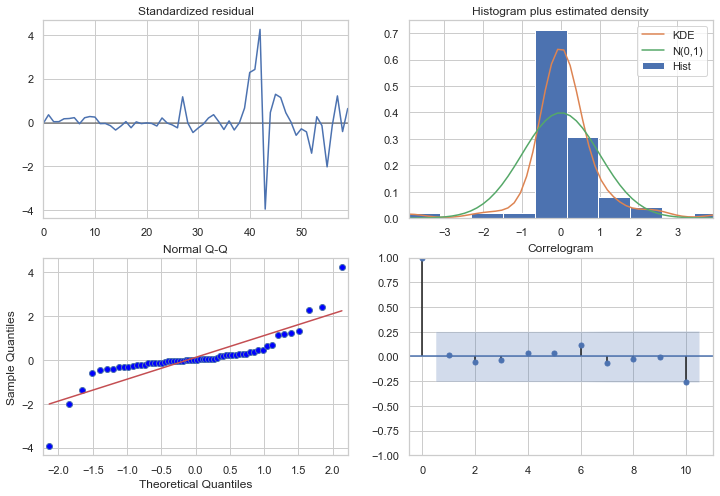

In [51]:
smodel2.plot_diagnostics(figsize=(12,8))
plt.show()

In [52]:
n_periods = len(test)
fitted_, confint_ = smodel2.predict(n_periods=n_periods, return_conf_int=True)
forecast_accuracy(fitted_, test.values)

{'mape': 0.049762416697717325,
 'me': -0.10299792515799956,
 'mae': 1.2841549359500355,
 'mpe': 0.005458115531440298,
 'rmse': 2.842118110589233,
 'acf1': 0.2677974447322396,
 'corr': 0.34498581719071236,
 'minmax': 0.046172333399281174}

In [53]:
# Build Model
order=(0, 1, 2)
seasonal_order=(1, 1, 0, 52)
smodel2 = sm.tsa.statespace.SARIMAX(dfx,
                order=order,
                seasonal_order=seasonal_order,
                freq=dfx.index.inferred_freq)
fitted2 = smodel2.fit(disp=-1)  
print(fitted2.summary())

C:\Users\Marylette\Anaconda3\envs\mglearn\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency W-FRI will be used.



                                      SARIMAX Results                                      
Dep. Variable:                      ave_cust_spend   No. Observations:                  157
Model:             SARIMAX(0, 1, 2)x(1, 1, [], 52)   Log Likelihood                -226.768
Date:                             Fri, 18 Jun 2021   AIC                            461.537
Time:                                     14:09:20   BIC                            472.114
Sample:                                 06-15-2018   HQIC                           465.822
                                      - 06-11-2021                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6972      0.055    -12.691      0.000      -0.805      -0.590
ma.L2         -0.0006      

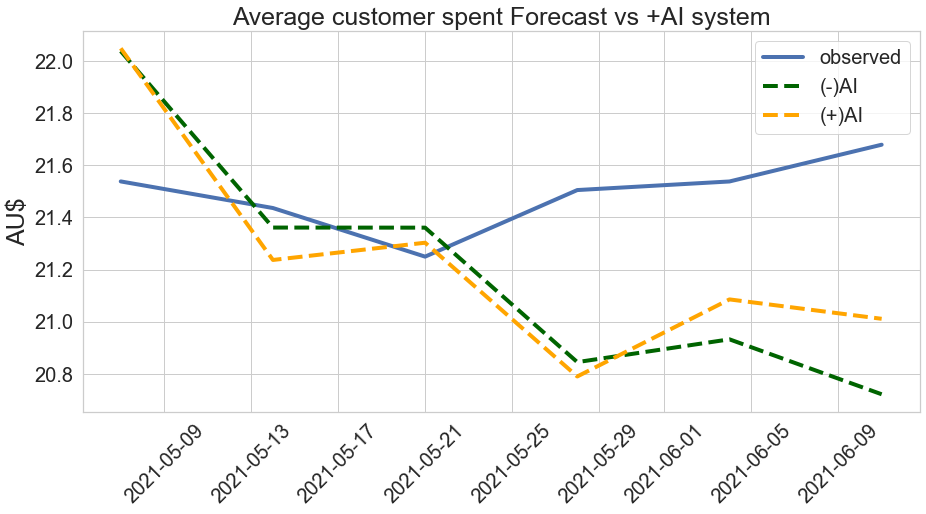

In [57]:
# Forecast
plt.rcParams["figure.figsize"] = (15,7)
plt.rc('font', size=10)

n_periods = 6
index_of_fc = pd.date_range("2021-05-07", periods = n_periods, freq='7D')


# without AI
fc = fitted.predict(start=index_of_fc[0], end=index_of_fc[-1], return_conf_int=True)
fitted_series = pd.Series(fc, index=index_of_fc)


# with AI
fc2 = fitted2.predict(start=index_of_fc[0], end=index_of_fc[-1], return_conf_int=True)

# make series for plotting purpose
fitted_series2 = pd.Series(fc2, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig, axes = plt.subplots(1, 1)
axes.plot(dfx.loc["2021-05":], linewidth=4.0, label="observed")
axes.plot(fitted_series, color='darkgreen', linewidth=4.0, label="(-)AI",  linestyle="--")
axes.plot(fitted_series2, color='orange', linewidth=4.0, label="(+)AI",  linestyle="--")
axes.legend(fontsize=20, loc="upper right")
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title("Average customer spent Forecast vs +AI system", fontsize=25)
plt.ylabel("AU$", fontsize=25)
plt.show()

In [58]:
ai = pd.DataFrame(dfx.loc["2021-05":].values, columns=["observed"])
ai["predicted (+AI)"] = fc.values
ai["predicted (-AI)"] = fc2.values
ai["difference"] = ai["predicted (-AI)"] - ai["predicted (+AI)"]
ai.index = dfx.loc["2021-05":].index
ai

observed  predicted (+AI)  predicted (-AI)  difference
date                                                               
2021-05-07  21.538188        22.037659        22.048425    0.010765
2021-05-14  21.436198        21.361314        21.237081   -0.124233
2021-05-21  21.249825        21.360935        21.303204   -0.057731
2021-05-28  21.505077        20.845435        20.790376   -0.055059
2021-06-04  21.538008        20.932773        21.085857    0.153084
2021-06-11  21.678964        20.722156        21.011491    0.289335

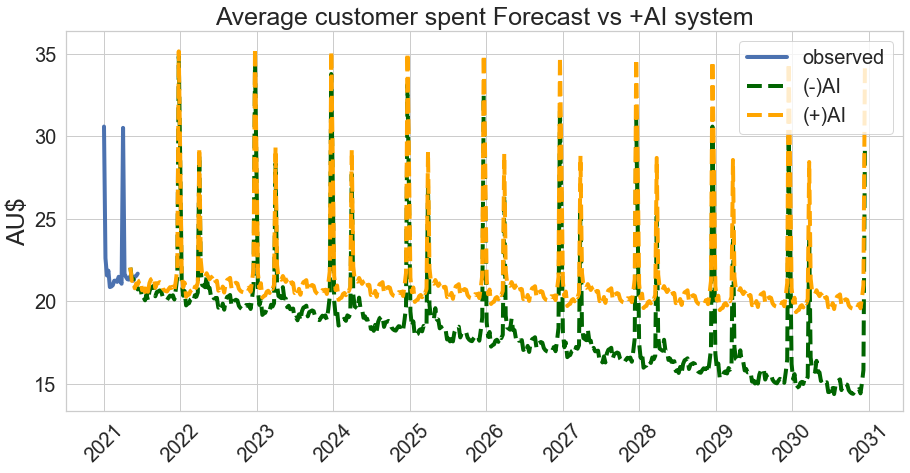

In [84]:
# Forecast
plt.rcParams["figure.figsize"] = (15,7)
plt.rc('font', size=10)

# n_periods = 34 # until 2021
n_periods = 502 # until 2021 + 10 years
# n_periods = 1124 
index_of_fc = pd.date_range("2021-05-07", periods = n_periods, freq='7D')


# without AI
fc = fitted.predict(start=index_of_fc[0], end=index_of_fc[-1], return_conf_int=True)
fitted_series = pd.Series(fc, index=index_of_fc)


# with AI
fc2 = fitted2.predict(start=index_of_fc[0], end=index_of_fc[-1], return_conf_int=True)

# make series for plotting purpose
fitted_series2 = pd.Series(fc2, index=index_of_fc)
# lower_series = pd.Series(confint[:, 0], index=index_of_fc)
# upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
fig, axes = plt.subplots(1, 1)
axes.plot(dfx.loc["2021":], linewidth=4.0, label="observed")
axes.plot(fitted_series, color='darkgreen', linewidth=4.0, label="(-)AI",  linestyle="--")
axes.plot(fitted_series2, color='orange', linewidth=4.0, label="(+)AI",  linestyle="--")
axes.legend(fontsize=20, loc="upper right")
# plt.fill_between(lower_series.index, 
#                  lower_series, 
#                  upper_series, 
#                  color='k', alpha=.15)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title("Average customer spent Forecast vs +AI system", fontsize=25)
plt.ylabel("AU$", fontsize=25)
plt.show()

When increase from +AI exceed -AI model error rate at 5%. 

In [85]:
(((fitted_series2 - fitted_series)) / fitted_series) > [0.5]*len(fitted_series)

2021-05-07    False
2021-05-14    False
2021-05-21    False
2021-05-28    False
2021-06-04    False
2021-06-11    False
2021-06-18    False
2021-06-25    False
2021-07-02    False
2021-07-09    False
2021-07-16    False
2021-07-23    False
2021-07-30    False
2021-08-06    False
2021-08-13    False
2021-08-20    False
2021-08-27    False
2021-09-03    False
2021-09-10    False
2021-09-17    False
2021-09-24    False
2021-10-01    False
2021-10-08    False
2021-10-15    False
2021-10-22    False
2021-10-29    False
2021-11-05    False
2021-11-12    False
2021-11-19    False
2021-11-26    False
              ...  
2030-05-24    False
2030-05-31    False
2030-06-07    False
2030-06-14    False
2030-06-21    False
2030-06-28    False
2030-07-05    False
2030-07-12    False
2030-07-19    False
2030-07-26    False
2030-08-02    False
2030-08-09    False
2030-08-16    False
2030-08-23    False
2030-08-30    False
2030-09-06    False
2030-09-13    False
2030-09-20    False
2030-09-27    False


### 📃 TO DO: 
- [ ] Add confidence intervals to forecast plots
- [ ] Functionalize model building etc and repeat on the other variables